In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

fifa_train = pd.read_csv("/content/drive/My Drive/ML/dacon/soccer_predict/FIFA_train.csv")

In [3]:
# 데이터 형태 확인
fifa_train.shape

(8932, 12)

In [4]:
fifa_train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


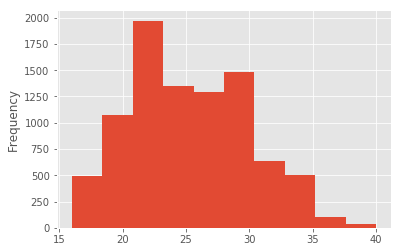

In [5]:
# 나이 분포 활용하기
fifa_train['age'].plot.hist()

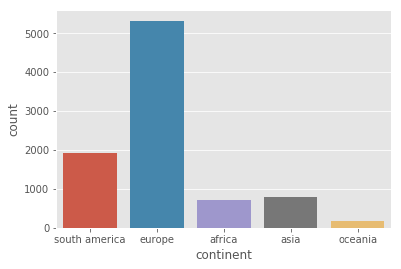

In [6]:
sns.countplot(fifa_train['continent'])

## 어떤 대륙의 선수가 가장 비쌀까?

In [0]:
c = fifa_train.groupby(['continent'])['value'].mean()

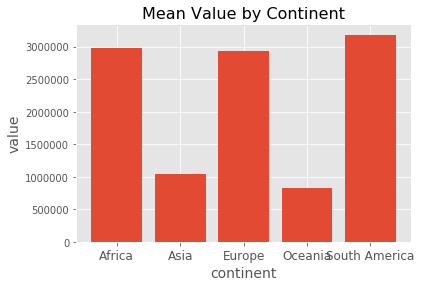

In [8]:
label = ['Africa', 'Asia', 'Europe', 'Oceania', 'South America']
indexing = np.arange(len(label))
plt.bar(indexing, c)
plt.title('Mean Value by Continent', fontsize = 16)
plt.xlabel('continent', fontsize = 14)
plt.ylabel('value', fontsize = 14)
plt.xticks(indexing, label, fontsize = 12)
plt.show()

In [0]:
c = fifa_train.groupby(['continent'])['value'].mean()

In [0]:
prefer = fifa_train.groupby(['prefer_foot'])['value'].mean()

In [0]:
label = ['Left', 'Right']

In [0]:
index = np.arange(len(label))

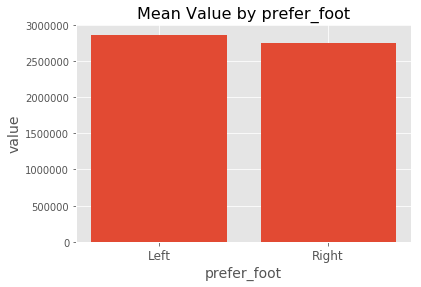

In [13]:
plt.bar(index, prefer)
plt.title('Mean Value by prefer_foot', fontsize = 16)
plt.xlabel('prefer_foot', fontsize = 14)
plt.ylabel('value', fontsize = 14)
plt.xticks(index, label, fontsize = 12)
plt.show()

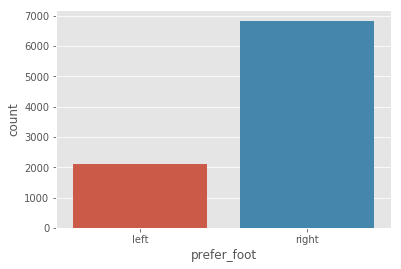

In [14]:
sns.countplot(fifa_train['prefer_foot'])

In [0]:
c = fifa_train.groupby(['prefer_foot'])['value'].mean()

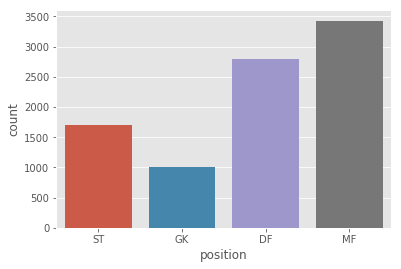

In [16]:
sns.countplot(fifa_train['position'])

In [0]:
v = fifa_train.groupby(['position'])['value'].mean()

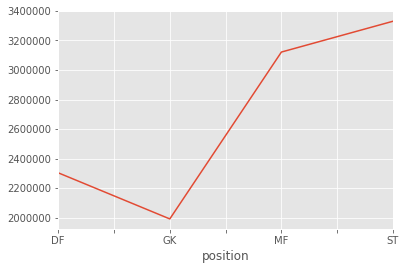

In [18]:
v.plot()

## 현재 능력치와 잠재 능력치의 확인

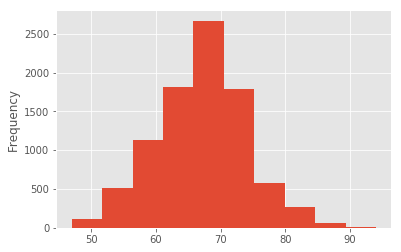

In [19]:
fifa_train['stat_overall'].plot.hist()

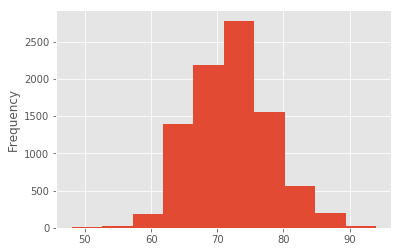

In [20]:
fifa_train['stat_potential'].plot.hist()

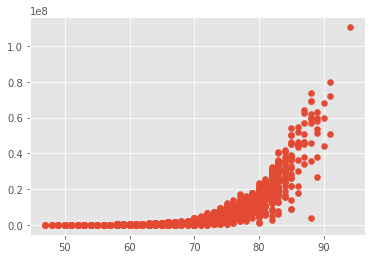

In [21]:
plt.scatter(fifa_train['stat_overall'], fifa_train['value'])

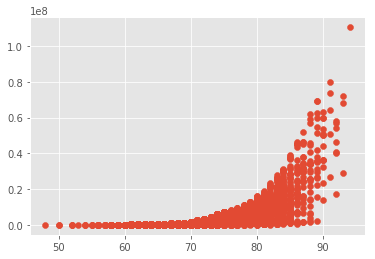

In [22]:
plt.scatter(fifa_train['stat_potential'], fifa_train['value'])

## 나이대별 가격

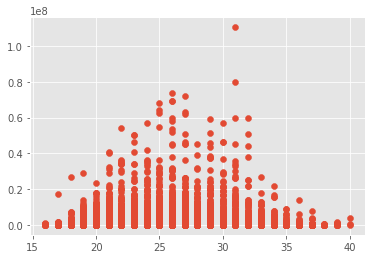

In [23]:
#연속형
plt.scatter(fifa_train['age'], fifa_train['value'])

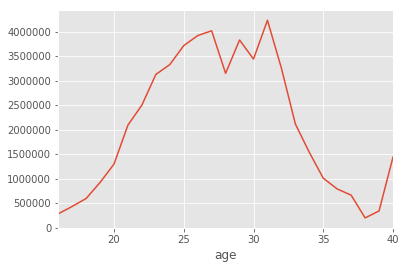

In [24]:
fifa_train.groupby(['age'])['value'].mean().plot()

##계약기간 변수 변환

In [25]:
fifa_train['contract_until']

0               2021
1               2020
2               2021
3               2020
4               2021
5               2019
6               2020
7               2023
8               2022
9               2024
10              2023
11              2020
12              2021
13              2020
14              2023
15              2021
16              2022
17              2022
18              2023
19              2021
20              2021
21              2022
22      Jun 30, 2019
23              2019
24              2023
25              2021
26              2021
27              2022
28              2020
29              2020
            ...     
8902            2021
8903            2021
8904            2021
8905            2021
8906            2020
8907            2019
8908            2020
8909            2021
8910            2019
8911            2019
8912            2021
8913            2021
8914            2021
8915            2021
8916            2020
8917            2019
8918         

In [0]:
fifa_train['contract_until'] = fifa_train['contract_until'].str.slice(-4,)
fifa_train['contract_until'] = fifa_train['contract_until'].astype(float)

In [27]:
fifa_train['contract_until'].dtype

dtype('float64')

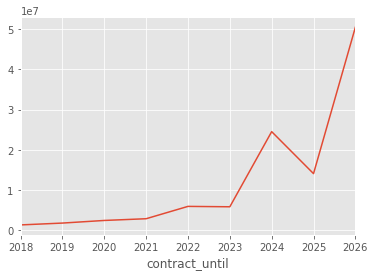

In [28]:
fifa_train.groupby(['contract_until'])['value'].mean().plot()

## 머신러닝이란 무엇인가

In [0]:
fifa_train = pd.read_csv('/content/drive/My Drive/ML/dacon/soccer_predict/FIFA_train.csv')
fifa_test = pd.read_csv('/content/drive/My Drive/ML/dacon/soccer_predict/FIFA_test.csv')
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()


### 32살이고 포지션이 GK, stat_potential : 60, stat_overall : 60

In [0]:
fifa_train['contract_until'] = fifa_train['contract_until'].str.slice(-4,)
fifa_train['contract_until'] = fifa_train['contract_until'].astype(float)
fifa_test['contract_until'] = fifa_test['contract_until'].str.slice(-4,)
fifa_test['contract_until'] = fifa_test['contract_until'].astype(float)

## 숫자로 바꿔주기

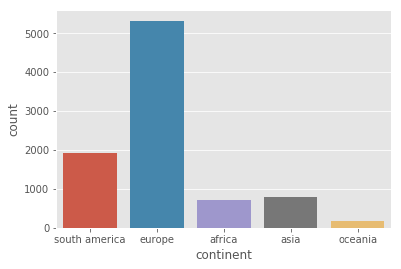

In [31]:
# 'continent' 'prefer_foot', 'position'
sns.countplot(fifa_train['continent'])



In [0]:
###
#'south america' ==> 0
#'europe' ==> 1
#'africa' ==> 2
#'asia' ==> 3
#'oceania' ==> 4
###

# label encoding
fifa_train['continent'] = fifa_train['continent'].map({'south america': 0 , 
                             'europe' : 1,
                             'africa' : 2, 
                             'asia' : 3,
                             'oceania' : 4})


In [0]:
fifa_test['continent'] = fifa_test['continent'].map({'south america': 0 , 
                             'europe' : 1,
                             'africa' : 2, 
                             'asia' : 3,
                             'oceania' : 4})

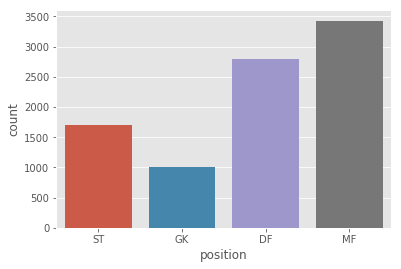

In [34]:
sns.countplot(fifa_train['position'])

In [0]:
fifa_train['position'] = fifa_train['position'].map({'ST': 0, 'GK':1, 'DF': 2, 'MF':3})
fifa_test['position'] = fifa_test['position'].map({'ST': 0, 'GK': 1, 'DF':2, 'MF':3})

In [0]:
fifa_train['prefer_foot'] = fifa_train['prefer_foot'].map({'left': 0, 'right': 1})
fifa_test['prefer_foot'] = fifa_test['prefer_foot'].map({'left': 0, 'right': 1})


In [37]:
fifa_train['value']

0       110500000.0
1        72000000.0
2        80000000.0
3        51000000.0
4        68000000.0
5        44000000.0
6        60000000.0
7        63000000.0
8        58000000.0
9        53500000.0
10       51500000.0
11       60000000.0
12       38000000.0
13       27000000.0
14       69500000.0
15       59500000.0
16       62000000.0
17       73500000.0
18       69500000.0
19       59000000.0
20       46000000.0
21       36000000.0
22       57000000.0
23        4000000.0
24       57000000.0
25       51000000.0
26       64000000.0
27       62500000.0
28       38000000.0
29       45000000.0
           ...     
8902        60000.0
8903        50000.0
8904        50000.0
8905        50000.0
8906        50000.0
8907        60000.0
8908        50000.0
8909        50000.0
8910        50000.0
8911        60000.0
8912        50000.0
8913        60000.0
8914        40000.0
8915        50000.0
8916        50000.0
8917        70000.0
8918        50000.0
8919        50000.0
8920        50000.0


In [0]:
#fifa_train_scaled = preprocessing.nomalize(fifa_train_scaled)
#fifa_test_scaled = preprocessing.normalize(fifa_test_scaled)

## Feature Selection
- categorical_feature와 numerical feature분리

In [0]:
categorical_feature_names = ['continent', 'prefer_foot', 'position']

for var in categorical_feature_names:
  fifa_train[var] = fifa_train[var].astype('category')
  fifa_test[var] = fifa_test[var].astype('category')
  

In [0]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators = 100, n_jobs = 1, random_state = 0)
model
y_train = fifa_train['value']
fifa_train_drop = fifa_train[['age', 'contract_until', 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves', 'reputation','position', 'continent' ]]
fifa_test = fifa_test[['age', 'contract_until', 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves', 'reputation', 'position', 'continent']]


## KFold

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from sklearn.metrics import make_scorer


k_fold = KFold(n_splits = 10, shuffle= True, random_state = 0)

def rmse(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    error = np.square(predicted_values - actual_values)
    # 평균을 낸다
    mean_error = error.mean()
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_error)

    return score
  
rmse_scorer = make_scorer(rmse)
rmse_scorer

make_scorer(rmse)

In [42]:
fifa_train_drop.head()
fifa_train_drop.shape

(8932, 9)

In [43]:
y_train = fifa_train['value']
y_train.shape

(8932,)

In [44]:
%time score = cross_val_score(model, fifa_train_drop, y_train, cv=k_fold, scoring=rmse_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

CPU times: user 13.9 s, sys: 67.8 ms, total: 14 s
Wall time: 14 s
Score= 838419.07247


## 모델 트레이닝 시키기

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf = RandomForestRegressor(n_estimators = 500)

from pprint import pprint

print('Parameters currently in use:\n')
print(rf.get_params())

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 8)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 4)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}

pprint(random_grid)

Parameters currently in use:

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
{'max_depth': [5, 13, 21, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 15, 100],
 'n_estimators': [100, 228, 357, 485, 614, 742, 871, 1000]}


In [0]:
fifa_train_x = fifa_train[['age','continent','contract_until','position','prefer_foot','reputation','stat_overall','stat_potential','stat_skill_moves']]
fifa_train_y = fifa_train['value']

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 2, n_jobs = 1)
X_train, X_test, y_train, y_test = train_test_split(fifa_train_x, fifa_train_y, test_size = 0.2)

In [48]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=485, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=13 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=485, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=13, total=   3.8s
[CV] n_estimators=485, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=13 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=485, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=13, total=   3.7s
[CV] n_estimators=485, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=13 
[CV]  n_estimators=485, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=13, total=   3.7s
[CV] n_estimators=357, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=13 
[CV]  n_estimators=357, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=13, total=   1.2s
[CV] n_estimators=357, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=13 
[CV]  n_estimators=357, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=13, total=   1.2s
[CV] n_estimators=357, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=13 
[CV]  n_estimators=357, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=13, total=   1.2s
[CV] n_estimators=1000, min_samples_split=100, min_s

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 11.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=500,
                                                   n_jobs=None, oob_score=False,
                                                   random_state=...o

In [0]:
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# initialize LinearRegression Model
LR_m = LinearRegression()

# Train Model
LR_m.fit(X_train, y_train)

# Predict and Evaluate
preds = LR_m.predict(X_train)

print('RMSE value for linear Regression', rmse(preds, y_train))


RMSE value for linear Regression 3547784.8703711964


{'alpha': 100.0, 'max_iter': 3000}
RMSE Value For Ridge Regression: 3555437.0221370547


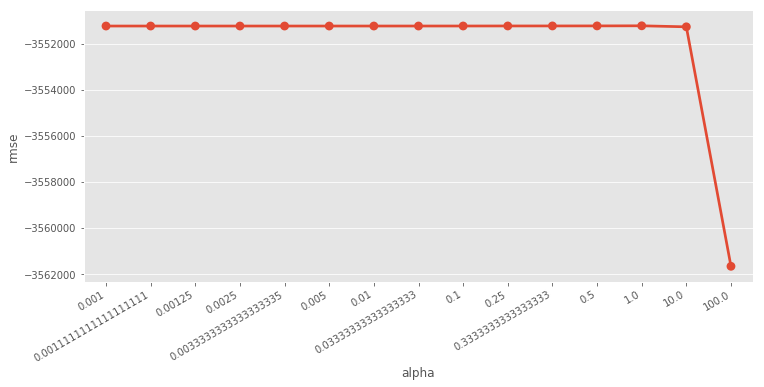

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_m = Ridge()

alpha = 1/np.array([0.01, 0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
ridge_params = {'max_iter' : [3000], 'alpha' : alpha}

rmse_scorer = metrics.make_scorer(rmse, greater_is_better = True)
grid_ridge_m = GridSearchCV(ridge_m, ridge_params, scoring = rmse_scorer, cv = 5)

grid_ridge_m.fit(X_train, y_train)
preds = grid_ridge_m.predict(X_train)

print(grid_ridge_m.best_params_)
print('RMSE Value For Ridge Regression:', rmse(preds, y_train))

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
df = pd.DataFrame(grid_ridge_m.cv_results_)
df['alpha'] = df['params'].apply(lambda x: x['alpha'])
df['rmse'] = df['mean_test_score'].apply(lambda x : -x)

plt.xticks(rotation = 30, ha = 'right')
sns.pointplot(data = df, x = 'alpha', y = 'rmse', ax = ax)

{'alpha': 0.001, 'max_iter': 3000}
RMSE Value For Lasso Regression: 3547784.8703711894


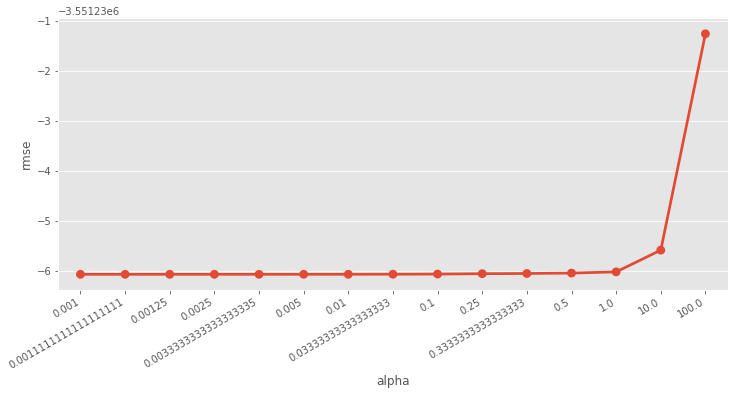

In [52]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

lasso_m_ = Lasso()

alpha = 1/np.array([0.01, 0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params_ = {'max_iter' : [3000], 'alpha' : alpha}

rmse_scorer = metrics.make_scorer(rmse, greater_is_better = True)
grid_lasso_m = GridSearchCV(lasso_m_, lasso_params_, scoring = rmse_scorer, cv = 5)

grid_lasso_m.fit(X_train, y_train)
preds = grid_lasso_m.predict(X_train)

print(grid_lasso_m.best_params_)
print("RMSE Value For Lasso Regression:", rmse(preds, y_train))

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
df = pd.DataFrame(grid_lasso_m.cv_results_)
df['alpha'] = df['params'].apply(lambda x: x['alpha'])
df['rmse'] = df['mean_test_score'].apply(lambda x : -x)

plt.xticks(rotation = 30, ha = 'right')
sns.pointplot(data = df, x = 'alpha', y = 'rmse', ax = ax)


In [53]:
from sklearn.ensemble import GradientBoostingRegressor

GBM_m_ = GradientBoostingRegressor(n_estimators = 4000, alpha = 0.01)

GBM_m_.fit(X_train, y_train)
preds = GBM_m_.predict(X_train)

print('RMSE Value For Gradient Boost:', rmse(preds, y_train))

RMSE Value For Gradient Boost: 138864.6463175784


## 제출해보기

In [54]:
prediction

NameError: ignored

In [0]:
sub_example = pd.read_csv("/content/drive/My Drive/ML/dacon/soccer_predict/submission.csv")
sub_example['value'] = prediction

In [0]:
sub_example.head()

In [0]:
sub_example.to_csv("/content/drive/My Drive/ML/dacon/soccer_predict/submission_first.csv", index = False)

## 모델을 발전시키는 방법

In [0]:
fifa_train['rep_skill'] = fifa_train['reputation'] + fifa_train['stat_skill_moves']
fifa_test['rep_skill'] = fifa_test['reputation'] + fifa_test['stat_skill_moves']

In [0]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(fifa_train[['rep_skill','age', 'continent', 'contract_until', 'position', 'prefer_foot', 'stat_overall', 'stat_potential', 'stat_skill_moves']],fifa_train['value'])

In [0]:
prediction = rf.predict(fifa_test[['rep_skill','age', 'continent', 'contract_until', 'position', 'prefer_foot', 'stat_overall', 'stat_potential', 'stat_skill_moves']])

In [0]:
sub_example = pd.read_csv("/content/drive/My Drive/ML/dacon/soccer_predict/submission.csv")
sub_example['value'] = prediction
sub_example.to_csv("/content/drive/My Drive/ML/dacon/soccer_predict/submission_third.csv", index = False)

## 나이와 포텐셜을 결합하면 더 예측을 잘 하지 않을까?

In [0]:
fifa_train['age_potential'] = fifa_train['age'] + fifa_train['stat_potential']
fifa_test['age_potential'] = fifa_test['age'] + fifa_test['stat_potential']

In [0]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(fifa_train[['age_potential', 'rep_skill','age', 'continent', 'contract_until', 'position', 'prefer_foot', 'stat_overall', 'stat_potential', 'stat_skill_moves']],fifa_train['value'])
prediction = rf.predict(fifa_test[['age_potential', 'rep_skill','age', 'continent', 'contract_until', 'position', 'prefer_foot', 'stat_overall', 'stat_potential', 'stat_skill_moves']])
sub_example['value'] = prediction
sub_example.to_csv("/content/drive/My Drive/ML/dacon/soccer_predict/submission_fourth.csv", index = False)